## Appendix: Upwind scheme
**강좌**: *기초 전산유체역학*

### Modified Wavenumber Analysis for Upwind scheme
PDE Solution을 $u(x, t) = \psi(t) e^{ikx}$ 로 생각한다. 

이를 아래 Upwind 차분식에 적용하면 다음과 같다.

$$
\frac{du(x_j, t)}{dt} = - a \frac{u(x_j,t) - u(x_{j-1}, t)}{\Delta x}
$$

$$
\frac{d \psi}{d t} e^{ikx_j} = - \frac{a}{\Delta x} \left (e^{ikx_j} - e^{ik(x_j - \Delta x)} \right) \psi 
$$

이를 정리하면

$$
\frac{d \psi}{d t} = - \frac{a}{\Delta x} \left (1 - e^{-ik\Delta x} \right) \psi 
= -a i \frac{-i + i  e^{-ik\Delta x}}{\Delta x} \psi = -a i k' \psi.
$$

차분식에 의해 Modified wavenumber $k'$ 은 다음과 같다.

$$
k' = \frac{-i + i  e^{-ik\Delta x}}{\Delta x}
$$

Stability 분석을 위해 모델 방정식 형태로 표현하면 $\lambda=-iak'$ 를 분석하면 다음과 같다.

$$
\lambda = - i a k' = - \frac{a}{\Delta x} \left (1 - e^{-ik\Delta x} \right)
$$

Central 기법과 달리 복소수이다.

### Stability Region 
앞서 구한 몇가지 ODE 에서 Stability region은 다음과 같다.

##### Euler Explicit
$$
\sigma = 1 + z
$$

##### 4차 정확도 Runge Kutta Method
$$
\sigma = 1 + z + \frac{1}{2} z^2 + \frac{1}{6} z^3 + \frac{1}{24} z^4
$$

여기서 $z=\lambda \Delta t$ 이다.

앞서 구한 $\lambda$ 를 이용해서 분석하면 다음과 같다.

$$
z = \lambda \Delta t = -\frac{a \Delta t}{\Delta x} \left (1 - e^{-ik\Delta x} \right)
= -\nu \left (1 - e^{-ik\Delta x} \right)
$$

이 경우 대부분 실수 측에서 Stability 한계가 결정된다.

이를 확인하기 위해 수치적으로 $(\nu, k \Delta x)$ 에 대해 극좌표게로 분석 가시화 해본다.

#### Euler Explicit

Von nuemann 안정성 분석과 동일한 결과이다.
- 실수측 $k \Delta x = 0, 180$ 일 때 $\sigma$ 가 최대이다.

- $Real(z)$ 대해서만 분석하면

$$
Real(z) = -\nu (1 - \cos(k \Delta x))
$$

즉

$$
\min(Real(z)) = - 2 \nu
$$

- Euler Explict의 최대 실수측 범위인 -2를 고려하면 

$$
\nu \leq 1.
$$

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np

plt.style.use('ggplot')
plt.rcParams['figure.dpi'] = 150

Text(0.5, 1.0, '$|\\sigma|$ for upwind scheme, EE')

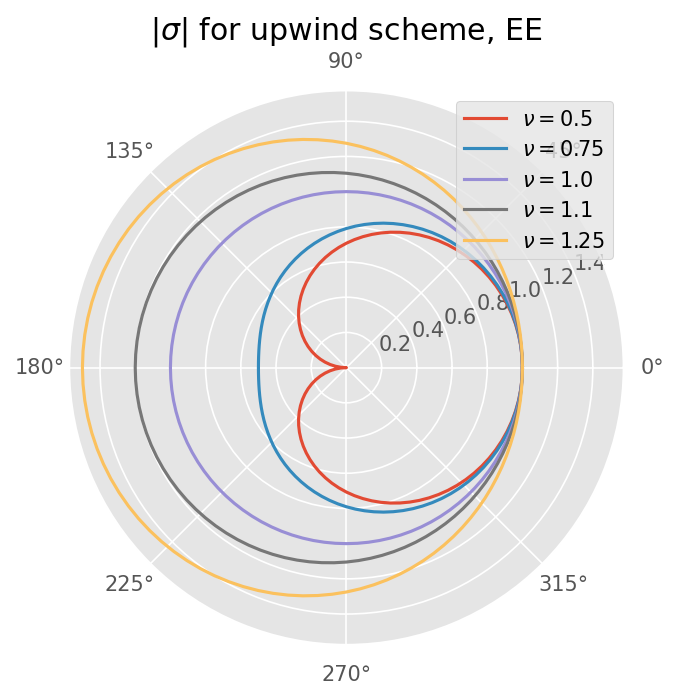

In [78]:
theta = np.linspace(0, 2*np.pi, 101)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

nus = [0.5, 0.75, 1.0, 1.1, 1.25]
for nu in nus:
    z = -nu *(1 - np.exp(-theta*1j))
    
    # Amplication factor for EE
    sigma = 1 + z
    ax.plot(theta, abs(sigma))

ax.legend([r'$\nu={}$'.format(nu) for nu in nus])
ax.set_title(r'$|\sigma|$ for upwind scheme, EE')

#### 4차 정확도 Runge Kutta Method

Von nuemann 안정성 분석과 동일한 결과이다.
- 실수측 $k \Delta x = 0, 180$ 일 때 $\sigma$ 가 최대이다.

- $Real(z)$ 대해서만 분석하면

$$
\min(Real(z)) = - 2 \nu
$$

- Euler Explict의 최대 실수측 범위인 -2.79를 고려하면 

$$
\nu \leq 1.395.
$$

Text(0.5, 1.0, '$|\\sigma|$ for upwind scheme, RK4')

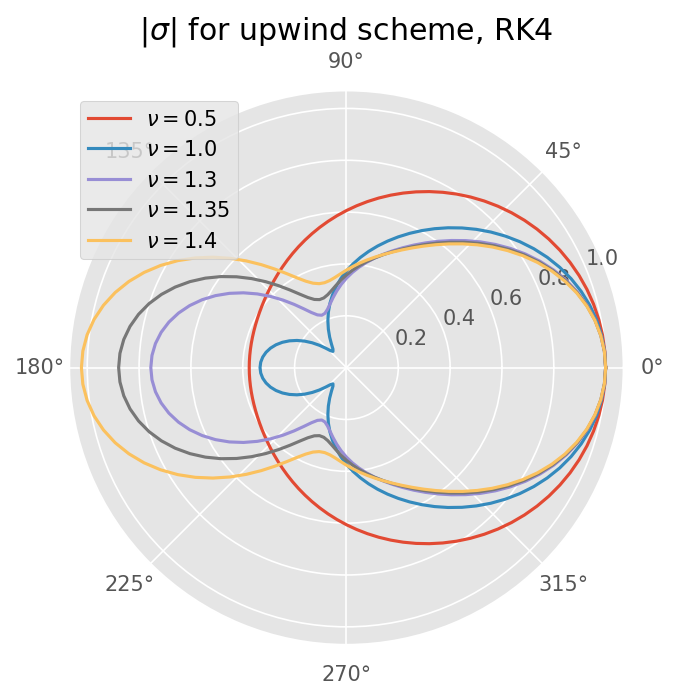

In [80]:
theta = np.linspace(0, 2*np.pi, 101)
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

nus = [0.5, 1.0, 1.3, 1.35, 1.4]
for nu in nus:
    z = -nu *(1 - np.exp(-theta*1j))
    
    # Amplication factor for RK4
    sigma = 1 + z + 0.5*z**2 + z**3/6 + z**4/24
    ax.plot(theta, abs(sigma))

ax.legend([r'$\nu={}$'.format(nu) for nu in nus])
ax.set_title(r'$|\sigma|$ for upwind scheme, RK4')